In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
from nltk.corpus import stopwords
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv


# 1-) Leitura dos Dados

In [2]:
tweets_df = pd.read_csv("/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv")
tweets_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


# 2-) Preprocessing

In [4]:
# Transformando todos os textos em caracteres minusculos
tweets_df.text = tweets_df.text.str.lower()
tweets_df.selected_text = tweets_df.selected_text.str.lower()
tweets_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","i`d have responded, if i were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,sooo sad,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","sons of ****,",negative


In [5]:
# Retirada do valor nulo para o texto
display(tweets_df[tweets_df.text.isnull()])
tweets_df.dropna(subset=['text'],inplace=True)
tweets_df.info()

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [6]:
# Analisando alguns textos
tweets_df.text.values[:25]

array([' i`d have responded, if i were going',
       ' sooo sad i will miss you here in san diego!!!',
       'my boss is bullying me...', ' what interview! leave me alone',
       ' sons of ****, why couldn`t they put them on the releases we already bought',
       'http://www.dothebouncy.com/smf - some shameless plugging for the best rangers forum on earth',
       '2am feedings for the baby are fun when he is all smiles and coos',
       'soooo high', ' both of you',
       ' journey!? wow... u just became cooler.  hehe... (is that possible!?)',
       ' as much as i love to be hopeful, i reckon the chances are minimal =p i`m never gonna get my cake and stuff',
       'i really really like the song love story by taylor swift',
       'my sharpie is running dangerously low on ink',
       'i want to go to music tonight but i lost my voice.',
       'test test from the lg env2', 'uh oh, i am sunburned',
       ' s`ok, trying to plot alternatives as we speak *sigh*',
       'i`ve been

* Retirar espaços exagerados
* Retirar pontuação e "stop words" como: I, the e etc ( Não comprometem o sentido da frase se eliminá-las)
* Retirar simbologia de emoticos como: =p , <3 e etc
* Retirar hyperlinks
* Retirar asteriscos de palavras "censuradas"

In [7]:
# FAZER O MEU, NÃO O COPY PASTE E AJEITAR PQ TA ESTRANHO
TROCAR_POR_ESPACO = re.compile('[/(){}\[\]\|@,;]')
REMOVER = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('(http)\S*', '', text) # Retirando os hiperlinks
    text = REMOVER.sub('', text) 
    text = TROCAR_POR_ESPACO.sub(' ', text)
    text = re.sub('[0-9]', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

tweets_df["clean_txt"] = tweets_df.text.apply(lambda t: clean_text(t))

In [8]:
# Limpeza dos tweets processados que ficaram sem texto
tweets_df = tweets_df[tweets_df.clean_txt.str.len() != 0]
tweets_df

,textID,text,selected_text,sentiment,clean_txt
0,cb774db0d1,"i`d have responded, if i were going","i`d have responded, if i were going",neutral,id responded going
1,549e992a42,sooo sad i will miss you here in san diego!!!,sooo sad,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","sons of ****,",negative,sons couldnt put releases already bought
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on denver husband l...,d lost,negative,wish could come see u denver husband lost job ...
27477,4f4c4fc327,i`ve wondered about rake to. the client has ...,", don`t force",negative,ive wondered rake client made clear net dont f...
27478,f67aae2310,yay good for both of you. enjoy the break - y...,yay good for both of you.,positive,yay good enjoy break probably need hectic week...
27479,ed167662a5,but it was worth it ****.,but it was worth it ****.,positive,worth


# 3-) EDA

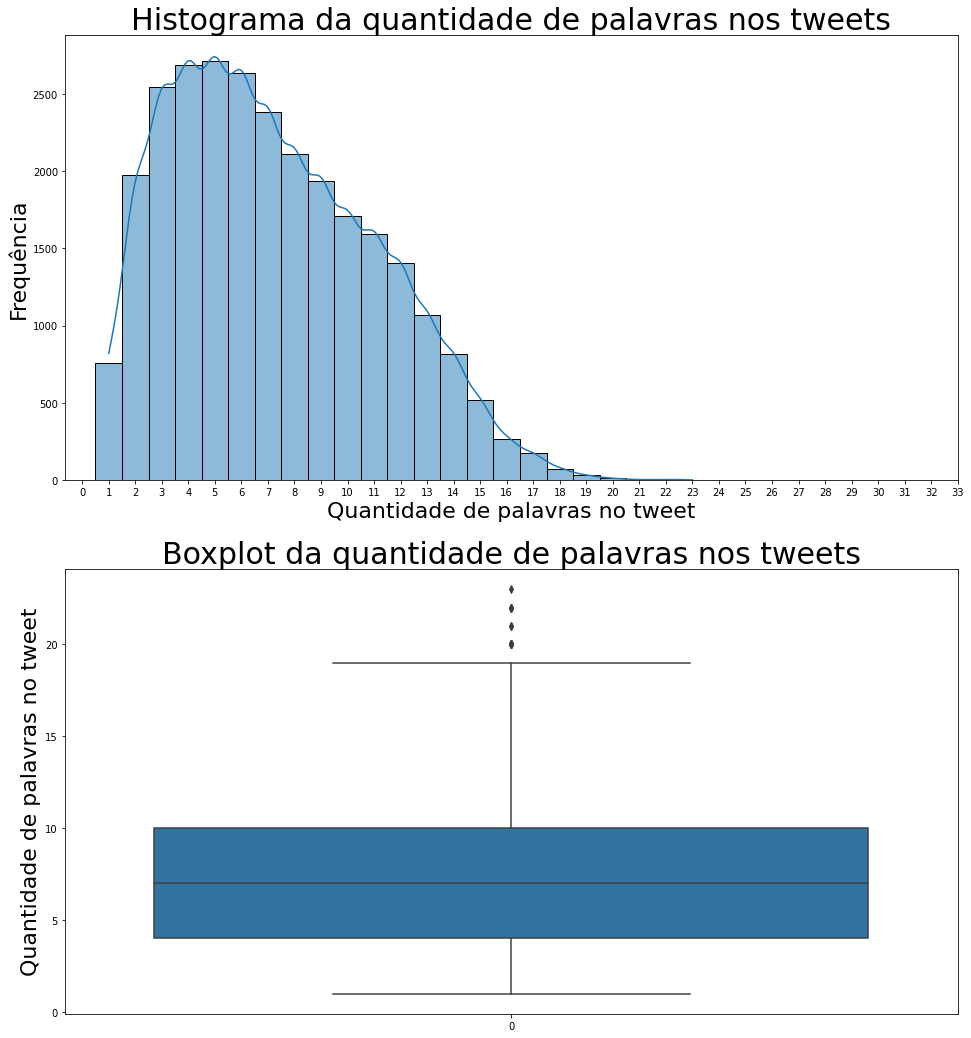

count    27418.000000
mean         7.205267
std          3.854073
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         23.000000
Name: clean_txt, dtype: float64

In [9]:
# ANÁLISE DOS TAMANHOS DOS TWEETS DO DATASET
size_tweets = tweets_df.clean_txt.apply(lambda t: len(str(t).split()))
fig,ax = plt.subplots(2,1,figsize=(16,18))

# Histograma
sns.histplot(data=size_tweets,common_bins=False,discrete=1,kde=True,ax=ax[0])
ax[0].set_xticks(np.arange(0,34,1))
ax[0].set_ylabel("Frequência",fontsize=22)
ax[0].set_xlabel("Quantidade de palavras no tweet",fontsize=22)
ax[0].set_title("Histograma da quantidade de palavras nos tweets",fontsize=30)

# Boxplot
sns.boxplot(data=size_tweets,ax=ax[1])
ax[1].set_ylabel("Quantidade de palavras no tweet",fontsize=22)
ax[1].set_title("Boxplot da quantidade de palavras nos tweets",fontsize=30)
plt.show()

display(size_tweets.describe())

Insights: No dataset processado
* A maioria dos tweets estão na faixa de 4-6 palavras
* No dataset processado não se estendem para mais de 33 palavras, baixa dispersão, tendo em vista q o Twitter permite ate 240 caracteres.
* Alguns poucos outliers ( Numa primeira análise não necessita retirada).
* Assimetria para tweets mais curtos.

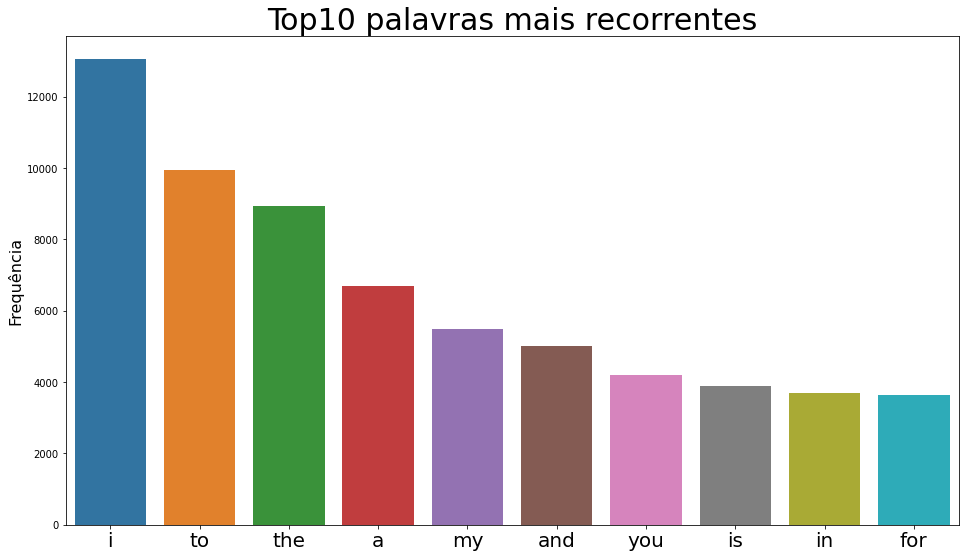

In [10]:
# ANÁLISE DAS PALAVRAS MAIS RECORRENTES

caracteres = tweets_df.text.apply(lambda t: str(t).split())
caracteres = caracteres.to_frame().explode('text').reset_index()
# Top10 palavras
top_caracteres = caracteres['text'].value_counts().sort_values(ascending=False).head(10)

fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.barplot(x = top_caracteres.index, y =top_caracteres.values,ax=ax)
ax.set_xticklabels(top_caracteres.index,fontsize=20)
ax.set_ylabel("Frequência",fontsize=16)
ax.set_title("Top10 palavras mais recorrentes",fontsize=30)
plt.show()


Insights: A palavras mais recorrentes são - de modo geral - artigos,pronomes e preposições da lingua inglesa. Percebe-se que são vocabulos bastante simples, não excedendo 3 letras.

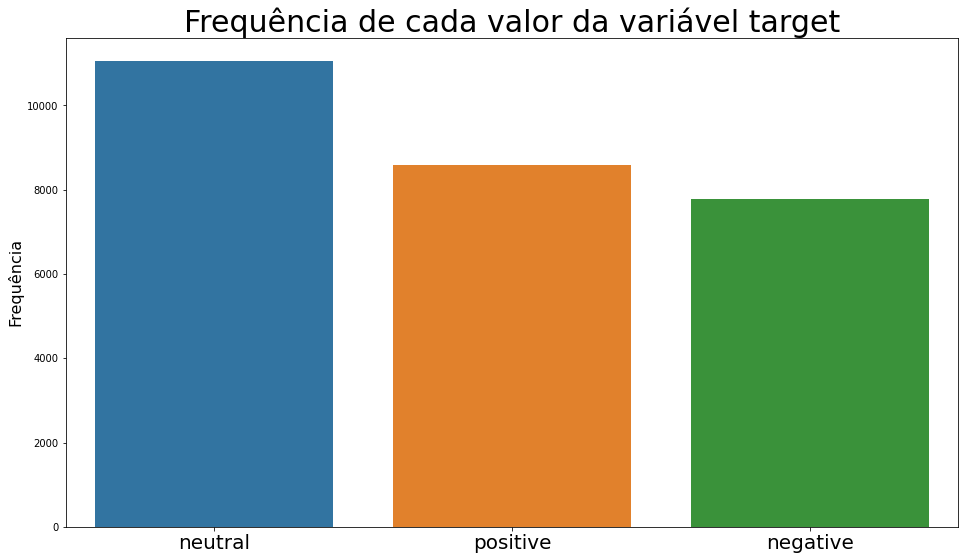

In [11]:
# Balanceamento das classe target
qtd_class = tweets_df.sentiment.value_counts()

fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.barplot(x = qtd_class.index, y =qtd_class.values,ax=ax)
ax.set_ylabel("Frequência",fontsize=16)
ax.set_xticklabels(qtd_class.index,fontsize=20)
ax.set_title("Frequência de cada valor da variável target",fontsize=30)
plt.show()

Insight: Bom balanceamento das classes.

# 3-) Feature Engineering